In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
import os
os.getcwd()

'C:\\Users\\sadhana reddy'

In [3]:
os.chdir('C:\\Users\\sadhana reddy\\Desktop\\Projects\\Big mart')

In [4]:
os.getcwd()

'C:\\Users\\sadhana reddy\\Desktop\\Projects\\Big mart'

In [5]:
Mart_data = pd.read_csv('Train.csv')

In [6]:
Mart_data.shape

(8523, 12)

In [7]:
Mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
Mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [9]:
# finding out unique categories for variables
Mart_data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [10]:
# replacing 'low fat' and 'LF' with unique category 'Low Fat'
Mart_data.Item_Fat_Content = Mart_data.Item_Fat_Content.replace(['LF','low fat','reg'],['Low Fat','Low Fat','Regular'])
Mart_data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [11]:
Mart_data.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [12]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [13]:
# Similarly checking unique categories for rest of columns
Mart_data.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [14]:
Mart_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [15]:
Mart_data.Outlet_Identifier.value_counts()

OUT027    935
OUT013    932
OUT046    930
OUT049    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [16]:
Mart_data.Outlet_Establishment_Year.value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [17]:
Mart_data.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [18]:
Mart_data.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [19]:
Mart_data.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [20]:
#converting object dtype columns to categorical columns
Mart_data.Item_Fat_Content = Mart_data.Item_Fat_Content.astype('category')
Mart_data.Item_Type = Mart_data.Item_Type.astype('category')
Mart_data.Outlet_Identifier = Mart_data.Outlet_Identifier.astype('category')
Mart_data.Outlet_Establishment_Year = Mart_data.Outlet_Establishment_Year.astype('category')
Mart_data.Outlet_Size = Mart_data.Outlet_Size.astype('category')
Mart_data.Outlet_Location_Type = Mart_data.Outlet_Location_Type.astype('category')
Mart_data.Outlet_Type = Mart_data.Outlet_Type.astype('category')

In [21]:
Mart_data.select_dtypes(include=['category']).head()

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Dairy,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,Regular,Soft Drinks,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,Low Fat,Meat,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,Regular,Fruits and Vegetables,OUT010,1998,NaN,Tier 3,Grocery Store
4,Low Fat,Household,OUT013,1987,High,Tier 3,Supermarket Type1


In [22]:
Mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,2181.288914
std,4.643456,0.051598,62.275067,1706.499616
min,4.555000,0.000000,31.290000,33.290000
25%,8.773750,0.026989,93.826500,834.247400
50%,12.600000,0.053931,143.012800,1794.331000
75%,16.850000,0.094585,185.643700,3101.296400
max,21.350000,0.328391,266.888400,13086.964800


In [23]:
#checking for missing values
# Finding columns with missing values(Nan) and number of missing values
Mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [24]:
#checking rows with missing values to examine if there are any relationships among variables
Mart_missing = Mart_data[Mart_data.isnull().any(axis = 1)]

In [25]:
Mart_missing.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.2,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.2,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.2,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680


In [26]:
Mart_missing.shape

(3873, 12)

In [27]:
Mart_missing.Outlet_Size.value_counts()

Medium    935
Small     528
High        0
Name: Outlet_Size, dtype: int64

In [28]:
Mart_missing.Outlet_Size.isnull().sum()

2410

In [29]:
Mart_missing.iloc[:,8] = Mart_missing.Outlet_Size.cat.add_categories('missing')

C:\Users\sadhana reddy\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [30]:
import warnings
warnings.filterwarnings('ignore')

In [31]:
Mart_missing = Mart_missing.fillna({'Outlet_Size':'missing'},inplace = True)

In [32]:
Mart_missing.Outlet_Size.value_counts()

missing    2410
Medium      935
Small       528
High          0
Name: Outlet_Size, dtype: int64

In [195]:
Mart_data['Outlet_Identifier'].loc[Mart_data['Outlet_Size'] == 'missing'].unique()

[OUT010, OUT045, OUT017]
Categories (3, object): [OUT010, OUT045, OUT017]

In [197]:
Mart_data['Outlet_Size'].loc[Mart_data['Outlet_Identifier'] == 'OUT010'].unique()
Mart_data['Outlet_Size'].loc[Mart_data['Outlet_Identifier'] == 'OUT045'].unique()
Mart_data['Outlet_Size'].loc[Mart_data['Outlet_Identifier'] == 'OUT017'].unique()

[missing]
Categories (1, object): [missing]

[missing]
Categories (1, object): [missing]

[missing]
Categories (1, object): [missing]

#### Since, all the outlet's with null values do not have any other size mapped to them. Just creating new category "MISSING" 

In [33]:
#Finding categories of items where Item_weight is null
Items_missing_weight = Mart_missing.Item_Type[Mart_missing.Item_Weight.isnull()].unique()
list(Items_missing_weight)

['Snack Foods',
 'Hard Drinks',
 'Baking Goods',
 'Canned',
 'Fruits and Vegetables',
 'Dairy',
 'Frozen Foods',
 'Household',
 'Breakfast',
 'Soft Drinks',
 'Meat',
 'Health and Hygiene',
 'Starchy Foods',
 'Others',
 'Seafood',
 'Breads']

In [34]:
#Similarly, replacing missing values for mean value of particular item_category
print('Mean of all values:',Mart_missing.Item_Weight.mean())

Mean of all values: 12.778479253111922


In [35]:
#Replacing missing values in Main data set "Mart_data"
Mart_data.iloc[:,8] = Mart_data.Outlet_Size.cat.add_categories('missing')
Mart_data = Mart_data.fillna({'Outlet_Size':'missing'},inplace = True)

In [37]:
Mart_data.head(9)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,missing,Tier 2,Supermarket Type1,1076.5986


In [38]:
list(Mart_data.Item_Type[Mart_data.Item_Weight.isnull()].unique())

['Snack Foods',
 'Hard Drinks',
 'Baking Goods',
 'Canned',
 'Fruits and Vegetables',
 'Dairy',
 'Frozen Foods',
 'Household',
 'Breakfast',
 'Soft Drinks',
 'Meat',
 'Health and Hygiene',
 'Starchy Foods',
 'Others',
 'Seafood',
 'Breads']

As there are categories ranging from frozen foods, meat,breads to Soft drinks..the missing value cannot be set to zero.
So in order to fill in the missing values, let us use mean for category as the measure.

In [39]:
#Finding the mean of all weight grouped by item_type
Mean_weights = Mart_data.groupby(by = 'Item_Type').mean().iloc[:,:1]
Mean_weights 

,Item_Weight
Item_Type,
Baking Goods,12.277108
Breads,11.346936
Breakfast,12.768202
Canned,12.305705
Dairy,13.426069
Frozen Foods,12.867061
Fruits and Vegetables,13.224769
Hard Drinks,11.400328
Health and Hygiene,13.142314


In [50]:
dict_mean = dict(Mean_weights)

In [67]:
Mart_data['Item_Weight'] = Mart_data.groupby(by = 'Item_Type')['Item_Weight'].transform(lambda x: x.fillna(x.mean()))

In [74]:
#checking if the values are properly mapped
Mart_data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.93000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.39500,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.65000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.98788,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.20000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,missing,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.20000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,missing,Tier 2,Supermarket Type1,4710.5350


In [72]:
Mart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Now that missing values have been imputed, Let's visualize the distribution of values across categories

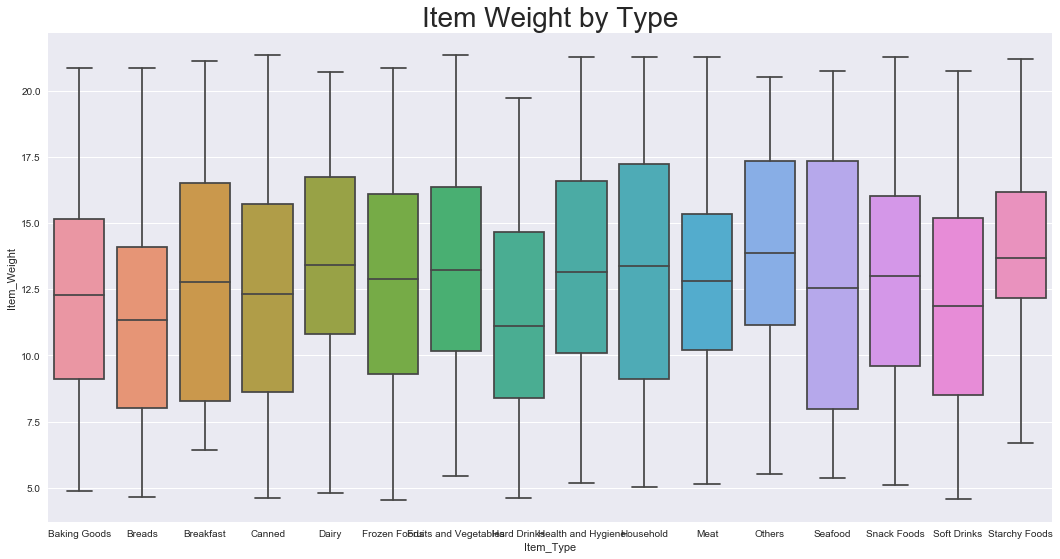

In [102]:
import seaborn as sns
plt.figure(figsize = (18,9))
sns.set(style = 'darkgrid', palette = 'muted', color_codes= True)
#boxplot
box = sns.boxplot(x='Item_Type', y='Item_Weight',data = Mart_data,whis = 1.5)
box.axes.set_title('Item Weight by Type', fontsize = 28)
box.legend(bbox_to_anchor = (1,1),loc =2)
plt.show()

<Container object of 4 artists>

([<matplotlib.axis.XTick at 0x272168907f0>,
 <a list of 4 Text xticklabel objects>)

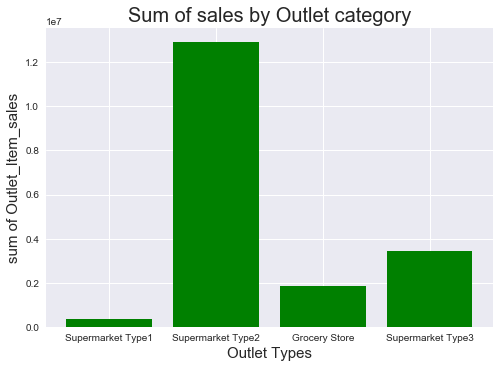

In [154]:
Types = list(Mart_data['Outlet_Type'].unique())
Sales = list(Mart_data.groupby(by ='Outlet_Type')['Item_Outlet_Sales'].sum())
X_label = np.arange(4)
plt.bar(X_label,Sales,color = 'green')
plt.xticks(X_label,('Supermarket Type1','Supermarket Type2','Grocery Store','Supermarket Type3'));
plt.title('Sum of sales by Outlet category',fontsize = 20);
plt.xlabel('Outlet Types',fontsize = 15);
plt.ylabel('sum of Outlet_Item_sales',fontsize = 15);
plt.show()

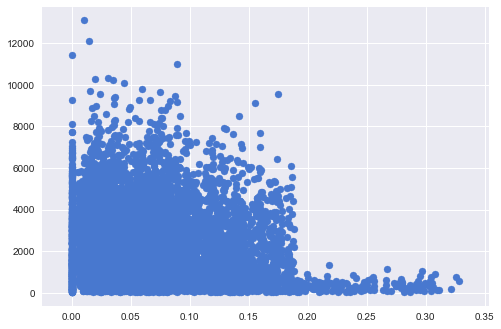

In [159]:
#check if percentage of visibility is affecting the item sales
#Mart_data.head()
plt.scatter('Item_Visibility','Item_Outlet_Sales',data = Mart_data)

In [163]:
#Finding the correlation between Item visibility on Item_outlet_sales across various categories
Mart_data['Item_Visibility'].corr(Mart_data['Item_Outlet_Sales'])

-0.12862461222077032

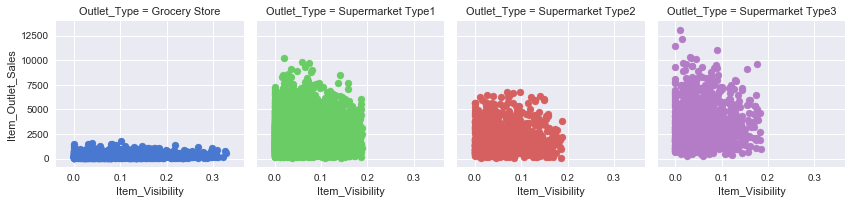

In [161]:
#Looking at the affect of Item visibility on price across various categories of Outlet Types
plt.figure(figsize = (18,18))
f = sns.FacetGrid(Mart_data,col='Outlet_Type',hue='Outlet_Type')
f = f.map(plt.scatter,'Item_Visibility','Item_Outlet_Sales',data = Mart_data)

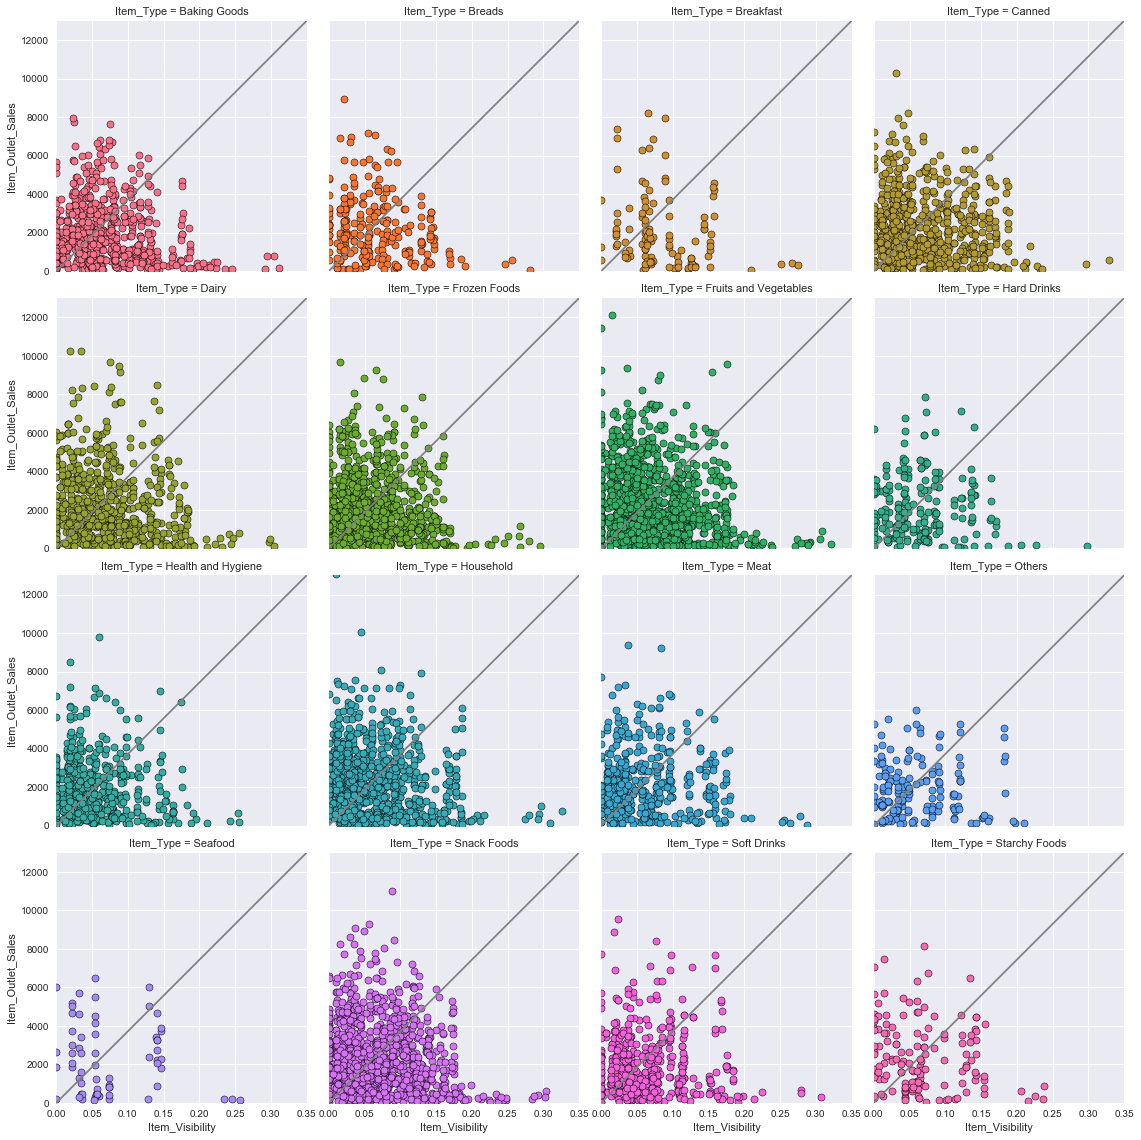

In [183]:
#Looking at the affect of Item visibility on price across various categories of Item_Types
f = sns.FacetGrid(Mart_data,col='Item_Type',hue='Item_Type',col_wrap=4, size=4)
kws = dict(s = 50, linewidth = 0.5, edgecolor = 'black')
f = f.map(plt.scatter,'Item_Visibility','Item_Outlet_Sales',**kws)
f.set(xlim = (0,0.35),ylim =(0,13000))
for ax in f.axes.flat:
    ax.plot((0,0.35),(0,13000), c = "gray", ls = '-')


In [172]:
#Finding if the correlation across categories also doesn't depend on visibility
Mart_data.groupby('Item_Type')['Item_Visibility','Item_Outlet_Sales'].corr().ix[0::2]

,,Item_Visibility,Item_Outlet_Sales
Item_Type,,,
Baking Goods,Item_Visibility,1.0,-0.158192
Breads,Item_Visibility,1.0,-0.222611
Breakfast,Item_Visibility,1.0,-0.217492
Canned,Item_Visibility,1.0,-0.086213
Dairy,Item_Visibility,1.0,-0.171494
Frozen Foods,Item_Visibility,1.0,-0.150191
Fruits and Vegetables,Item_Visibility,1.0,-0.150844
Hard Drinks,Item_Visibility,1.0,-0.070572
Health and Hygiene,Item_Visibility,1.0,-0.149596


As for all the items in above correlation matrix and in figure, "ITEM VISIBILITY" and "ITEM_OUTLET_SALES" are negatively correlated. Since, this might not be the usual scenario finding based on individual scario in stores.
Finding the number of items for a particular product sold and understand if there is any correlation with Item visibility.

In [185]:
Mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [217]:
#Creating a new column, Number of items sold for a Particular Item at a Particular Outlet
Mart_data.Item_Identifier.unique().size

1559

In [219]:
Mart_data = Mart_data.assign(Num_Items_sold= Mart_data['Item_Outlet_Sales']/Mart_data['Item_MRP'])
Mart_data[['Item_Outlet_Sales','Item_MRP','Num_Items_sold']].head()

,Item_Outlet_Sales,Item_MRP,Num_Items_sold
0,3735.1380,249.8092,14.951963
1,443.4228,48.2692,9.186454
2,2097.2700,141.6180,14.809346
3,732.3800,182.0950,4.021967
4,994.7052,53.8614,18.467868


In [224]:
#correlation between Number_Items_sold and Item_Visibility by Item_type
Mart_data.groupby('Item_Type')['Item_Visibility','Num_Items_sold','Item_Outlet_Sales'].corr().ix[0::3]

,,Item_Visibility,Num_Items_sold,Item_Outlet_Sales
Item_Type,,,,
Baking Goods,Item_Visibility,1.0,-0.192222,-0.158192
Breads,Item_Visibility,1.0,-0.210728,-0.222611
Breakfast,Item_Visibility,1.0,-0.177475,-0.217492
Canned,Item_Visibility,1.0,-0.135737,-0.086213
Dairy,Item_Visibility,1.0,-0.200845,-0.171494
Frozen Foods,Item_Visibility,1.0,-0.146985,-0.150191
Fruits and Vegetables,Item_Visibility,1.0,-0.170454,-0.150844
Hard Drinks,Item_Visibility,1.0,-0.145418,-0.070572
Health and Hygiene,Item_Visibility,1.0,-0.164202,-0.149596


## From the above matrix, there is not much difference with correlation from Outlet_sales wrt number_products_sold

In [226]:
Mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Num_Items_sold
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14.951963
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,9.186454
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14.809346
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,missing,Tier 3,Grocery Store,732.3800,4.021967
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,18.467868
